In [1]:
import civicweb_scraper
import pandas as pd
from pathlib import Path
import glob
from csv import DictReader
import logging
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [3]:
logger = civicweb_scraper.logger_setup()
# logger.setLevel(logging.DEBUG)
logger.setLevel(logging.INFO)

# Compile all documents

In [4]:
document_files = [doc for doc in glob.glob(f"{civicweb_scraper.TRACKING_FOLDER}/*_documents.csv")]
logger.debug(f"Found {len(document_files)} document files")

In [5]:
documents = []
for doc in document_files:
     with open(doc,'r') as f:
          dict_reader = DictReader(f)
          documents.extend(list(dict_reader))

In [6]:
df = pd.DataFrame(documents)

In [7]:
len_df= len(df)

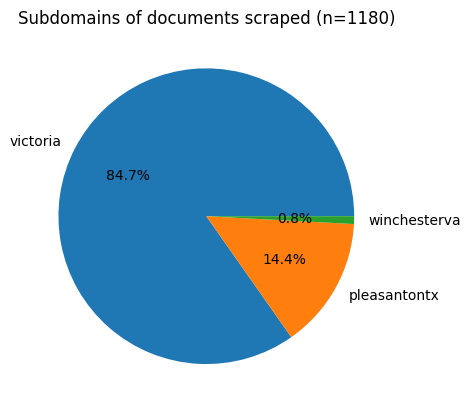

In [8]:
# create a pie chart of the type of file_types
plt.title(f"Subdomains of documents scraped (n={len_df})")
# df['subdomain'].value_counts().plot(kind='pie', autopct='%0.1f%%')
plt.pie(df['subdomain'].value_counts(), labels=df["subdomain"].unique(), autopct='%0.1f%%');

In [9]:
df["parent_folder"] = df["parent_path"].apply(lambda x: x.split("/")[-1])

Text(0.5, 0, 'Number of Documents')

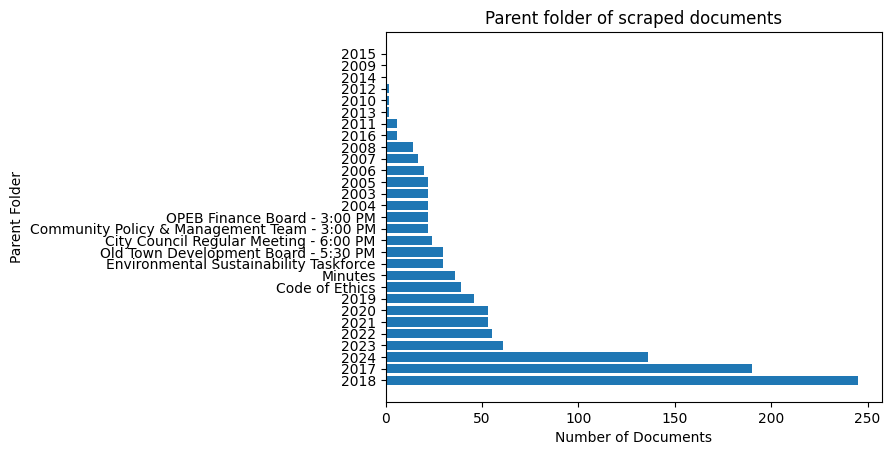

In [22]:
plt.title("Parent folder of scraped documents")
plt.barh(width=df['parent_folder'].value_counts(), y=df["parent_folder"].unique(),);
plt.ylabel("Parent Folder")
plt.xlabel("Number of Documents")

In [ ]:
plt.title("First layer of scraped documents")
plt.pie(df['parent_folder'].value_counts(), labels=df["parent_folder"].unique(), autopct='%0.1f%%');


In [ ]:
plt.title("Pie graph of scraped documents file types")
df['parent_path'].value_counts().plot(kind='pie', autopct='%0.1f%%')

In [47]:
df['file_type'].unique()

array(['text/html', 'application/pdf',
       'application/vnd.openxmlformats-officedocument.spreadsheetml.sheet',
       ''], dtype=object)

In [48]:
df[df["file_type"]=="application/vnd.openxmlformats-officedocument.spreadsheetml.sheet"]

,name,file_type,subdomain,parent_path,root_url,url,parent_url,date_scraped,error,,'error',parent_folder
188,OTAC April 2021 Monthly Expenses.xlsx,application/vnd.openxmlformats-officedocument....,winchesterva,Agendas/Old Town Advancement Commission/Old To...,https://winchesterva.civicweb.net,/document/30032,/filepro/documents/15739,2024-07-30 19:39:28,,NaN,NaN,Old Town Development Board - 5:30 PM


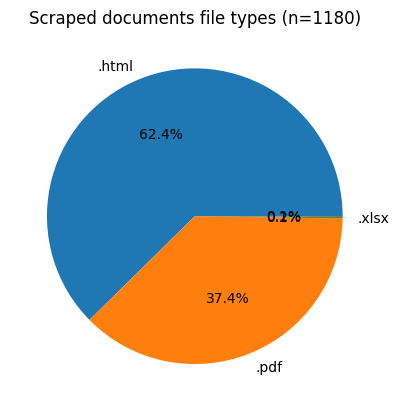

In [53]:
plt.title(f"Scraped documents file types (n={len_df})")
# df['file_type'].value_counts().plot(kind='pie', autopct='%0.1f%%')
plt.pie(df['file_type'].value_counts(), labels=[".html", ".pdf", ".xlsx", ""], autopct='%0.1f%%');

In [24]:
df['file_type'].value_counts()

file_type
application/pdf                                                      736
text/html                                                            441
                                                                       2
application/vnd.openxmlformats-officedocument.spreadsheetml.sheet      1
Name: count, dtype: int64